In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Merging the csv files into one

In [3]:
path="./Sales_Data"

files=[file for file in os.listdir(path) if not file.startswith('.')]

all_months_data= pd.DataFrame()

for file in files:
  current_data= pd.read_csv(path+"/"+file)
  all_months_data=pd.concat([all_months_data, current_data])
  
all_months_data.to_csv("all_data_copy.csv", index=False)

In [4]:
main= pd.read_csv('all_data_copy.csv')
data=main.copy()
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [6]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
#data[data['Order ID'].isna()]['Order ID']

# Cleaning DATA

In [8]:
nan=data[data.isna().any(axis=1)]
display(nan.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data=data.dropna(how='all')

In [10]:
data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# Changing values to their proper form (int)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [12]:
# Removing string value from date
data=data[data['Order Date'].str[0:2]!='Or']

In [13]:
# Conversion to int value
data['Month']=data['Order Date'].str[0:2]
data['Month']=data['Month'].astype('int32')

In [14]:
# Alternative Method for column creation
#data['Month 2']=pd.to_datetime(data['Order Date'],format='%m/%d/%y %H:%M').dt.month
#data=data.drop(columns=['Month 2'])

In [15]:
data['Quantity Ordered']=pd.to_numeric(data['Quantity Ordered'])

data['Price Each']=pd.to_numeric(data['Price Each'])

In [16]:
# Making a city column

def get_city(address):
  return address.split(',')[1]

def get_state(address):
  return address.split(',')[2].split(' ')[1]


data['City']=data['Purchase Address'].apply(lambda x:get_city(x)+'('+get_state(x)+')')

In [17]:
data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston(MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles(CA)


In [18]:
data['Sales']=data['Quantity Ordered'] * data['Price Each']

Q1-Best Month for sales

In [19]:
sales_bymonth=data.groupby(['Month']).sum()
sales_bymonth=sales_bymonth.drop(columns=['Order ID','Product','Price Each','Order Date','Purchase Address','City'])


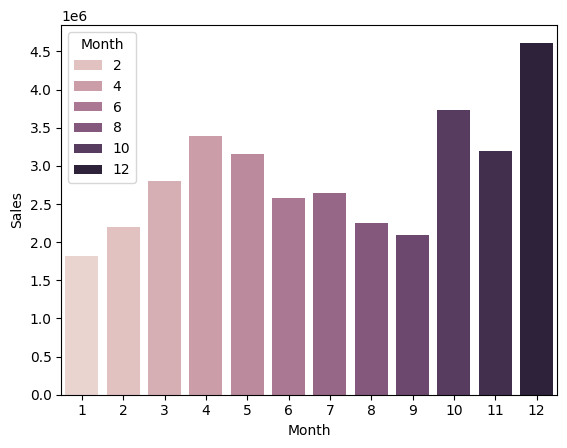

In [20]:
ax=sns.barplot(data=sales_bymonth,x='Month',y='Sales',hue='Month')
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
#for bars in ax.containers:
  #ax.bar_label(bars)

Q2- Most sold product by city

In [21]:
sales_bycity=data.groupby(['City']).sum()
sales_bycity=sales_bycity.drop(columns=['Order ID','Product','Order Date','Purchase Address','Price Each'])

In [22]:
sales_bycity

,Quantity Ordered,Month,Sales
City,,,
Atlanta(GA),16602,104794,2795498.58
Austin(TX),11153,69829,1819581.75
Boston(MA),22528,141112,3661642.01
Dallas(TX),16730,104620,2767975.40
Los Angeles(CA),33289,208325,5452570.80
New York City(NY),27932,175741,4664317.43
Portland(ME),2750,17144,449758.27
Portland(OR),11303,70621,1870732.34
San Francisco(CA),50239,315520,8262203.91


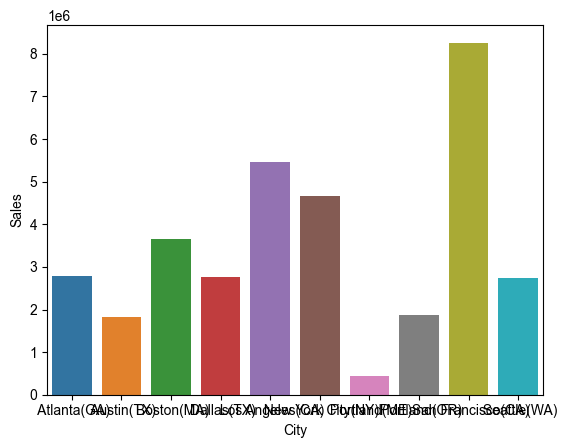

In [23]:
sns.barplot(data=sales_bycity,x='City',y='Sales',hue='City')

sns.set_theme(rc={'figure.figsize':(20,5)})


Q3- What time to have the products displayed so as to maximize the sales to customer?

In [24]:
data['Hour']=pd.to_datetime(data['Order Date'],format='%m/%d/%y %H:%M').dt.hour

data['Minute']=pd.to_datetime(data['Order Date'],format='%m/%d/%y %H:%M').dt.minute

data['Count'] = 1

In [25]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas(TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston(MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles(CA),11.99,9,27,1


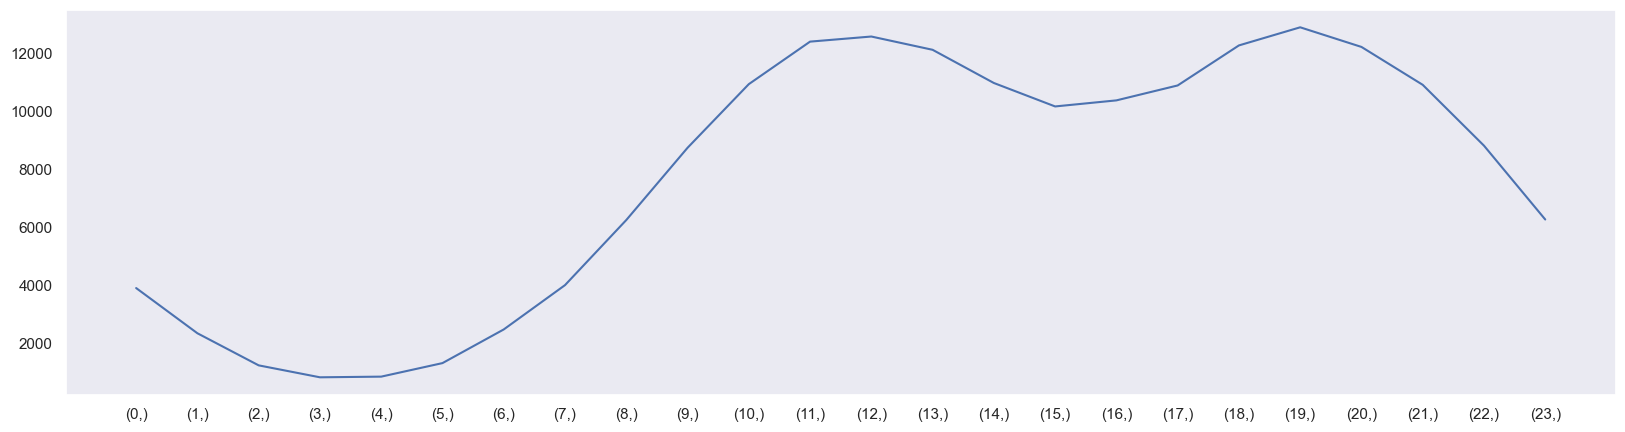

In [28]:
import numpy as np
import matplotlib.pyplot as plt

ax = [pair for pair, df in data.groupby(['Hour'])]

plt.plot(ax, data.groupby(['Hour']).count()['Count'])
plt.xticks(np.arange(len(ax)), ax)  
plt.grid()
plt.show()


Q4- Products sold together

In [30]:
df = data[data['Order ID'].duplicated(keep=False)].copy()

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()


In [31]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Q5- Product sold the most

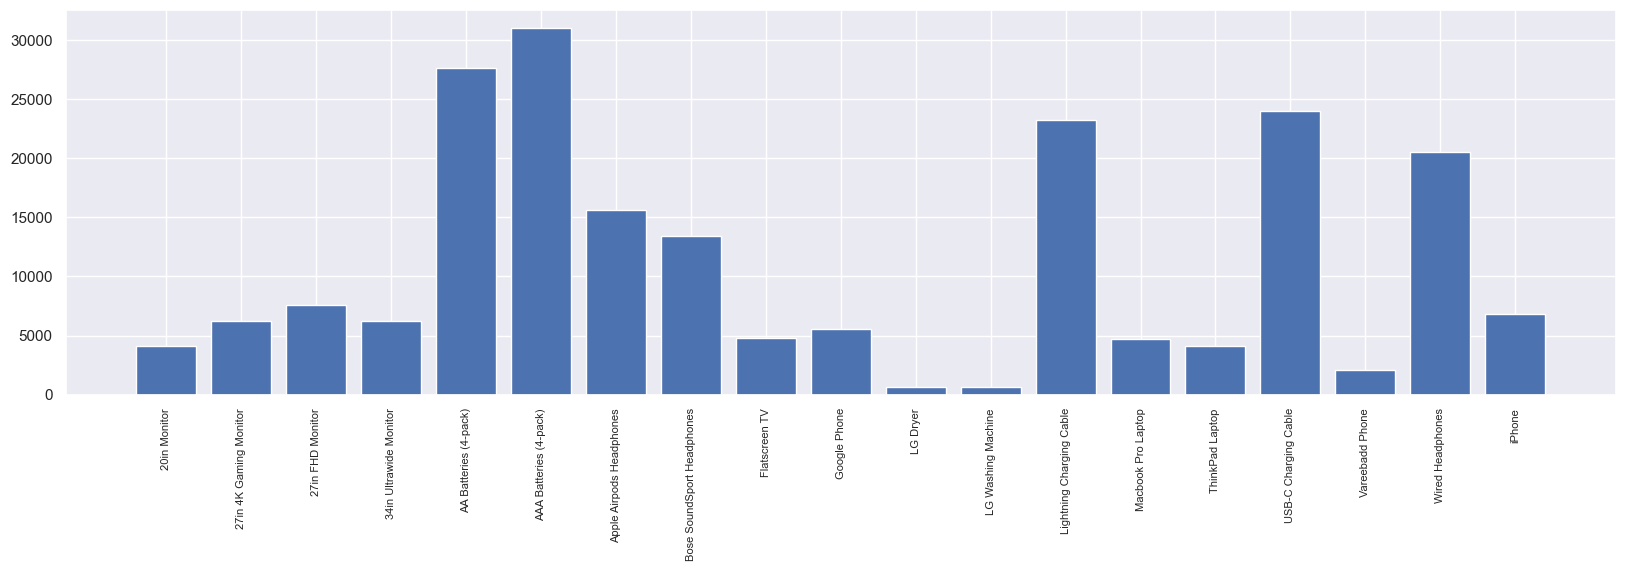

In [32]:
product_group = data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()